In [1]:
## Random projections of high-dimensional data
# for database example: digits
# Jan Nagler (adapted, Rosebrock), April 21
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # works
#warnings.filterwarnings(action='once') #does not work

import matplotlib.pyplot as plt
import numpy as np

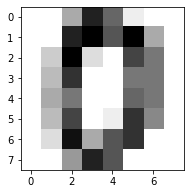

In [2]:
# Load database digits, ref:
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
digits = datasets.load_digits()
split = train_test_split(digits.data, digits.target, test_size = 0.3,
    random_state = 11)
(trainData, testData, trainTarget, testTarget) = split

# Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1+1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [5]:
digits.data.shape

(1797, 64)

In [3]:
# Print what the theory says for k, given an eps(ilon)
# for n=1797 images, dimension d=8x8=64 (digits)
print ("Professors Johnson and Lindenstrauss say: k >=", johnson_lindenstrauss_min_dim(1797,eps=0.1))

Professors Johnson and Lindenstrauss say: k >= 6423


In [4]:
model = LinearSVC()
model.fit(trainData, trainTarget)
baseline = metrics.accuracy_score(model.predict(testData), testTarget)
accuracies = []
dims = np.int32(np.linspace(2, 64, 20))

In [5]:
# Loop over the projection sizes, k
for dim in dims:
    # Create random projection
    sp = SparseRandomProjection(n_components = dim)
    X = sp.fit_transform(trainData)
 
    # Train classifier of your choice on the sparse random projection
    model = LinearSVC()
    model.fit(X, trainTarget)
 
    # Evaluate model and update accuracies
    test = sp.transform(testData)
    accuracies.append(metrics.accuracy_score(model.predict(test), testTarget))

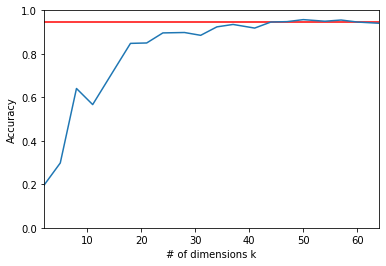

In [6]:
# Create figure
plt.figure()
plt.xlabel("# of dimensions k")
plt.ylabel("Accuracy")
plt.xlim([2, 64])
plt.ylim([0, 1])
 
# Plot baseline and random projection accuracies
plt.plot(dims, [baseline] * len(accuracies), color = "r")
plt.plot(dims, accuracies)

plt.show()